In [10]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql


%matplotlib inline

# EURO CFTC Analysis
#### (i)Clean data; (ii)Calculate 'Net Non-commercial contracts'; (iii)Calculate avg, std & z-scores; (iv)Add security data to list; (v)Plot results; (vi) Plot price chart

In [11]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
EUR_data = ql.get('CFTC/099741_FO_L_ALL')
EUR_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-23,648743.0,191267.0,71914.0,39122.0,329802.0,493053.0,560192.0,604089.0,88551.0,44653.0
2020-06-30,643597.0,180338.0,78317.0,40708.0,330721.0,481901.0,551767.0,600927.0,91829.0,42670.0
2020-07-07,646323.0,186241.0,80047.0,35223.0,331247.0,489461.0,552712.0,604731.0,93611.0,41592.0
2020-07-14,667904.0,195890.0,83766.0,41318.0,333107.0,496278.0,570315.0,621362.0,97589.0,46541.0
2020-07-21,710896.0,205351.0,75666.0,56487.0,346268.0,532435.0,608105.0,664588.0,102790.0,46307.0


In [12]:
#Clean Data
EUR_data = EUR_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
EUR_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1999-01-05,0.0,240.0
1999-01-12,1717.0,1277.0
1999-01-19,1256.0,283.0
1999-01-26,1256.0,270.0
1999-02-02,1930.0,12284.0


In [13]:
#Calculate Net Data
EUR_data["Net Noncommercial Futures/Options"] = EUR_data["Noncommercial Long"] - EUR_data["Noncommercial Short"]
EUR_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-23,191267.0,71914.0,119353.0
2020-06-30,180338.0,78317.0,102021.0
2020-07-07,186241.0,80047.0,106194.0
2020-07-14,195890.0,83766.0,112124.0
2020-07-21,205351.0,75666.0,129685.0


In [14]:
#Calculate mean, std and Z-Score
Average = EUR_data["Net Noncommercial Futures/Options"].mean()
x = np.array(EUR_data["Net Noncommercial Futures/Options"])
std = x.std()

z_score_historical_eur = ((EUR_data["Net Noncommercial Futures/Options"][-1]) - Average)/std
z_score_historical_eur


2.054733847481858

In [15]:
#Create list to display data

EUR_list = ["Currency", "EUR", EUR_data["Net Noncommercial Futures/Options"][-1], Average, std, z_score_historical_eur]
print(EUR_list)

['Currency', 'EUR', 129685.0, -8889.348444444444, 67441.5076260469, 2.054733847481858]


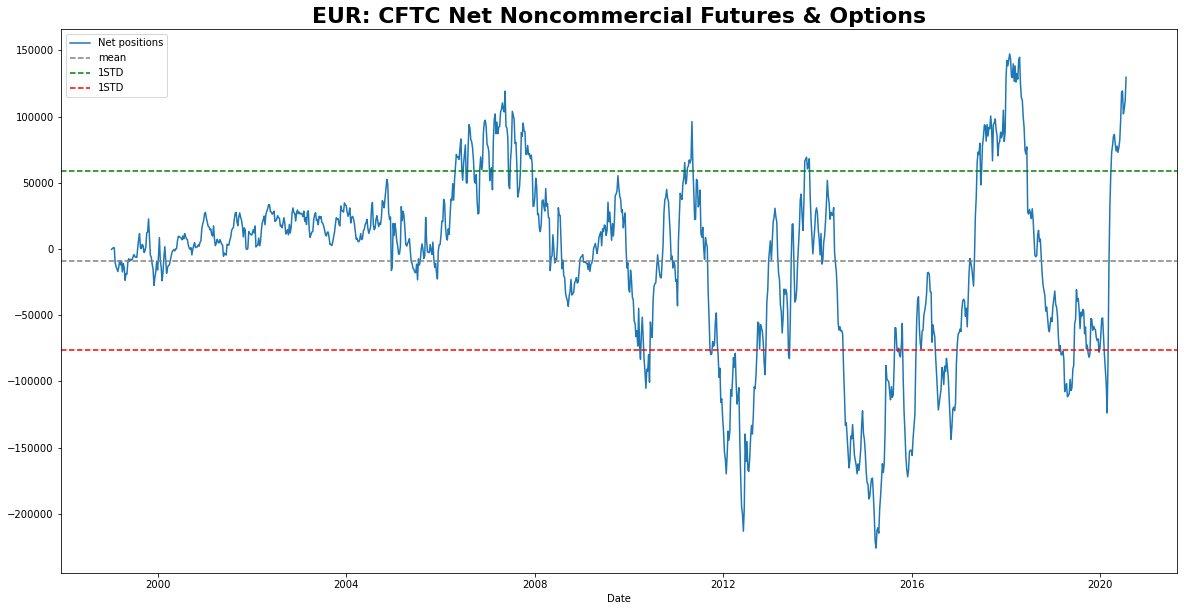

In [16]:
#Plot EUR CFTC data
def create_plot(x_axis_data, y_axis_data, asset_name):
    x = EUR_data.index
    y = EUR_data["Net Noncommercial Futures/Options"]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"{asset_name}: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
#create_plot(EUR_data["Net Noncommercial Futures/Options"])
create_plot(EUR_data.index, EUR_data["Net Noncommercial Futures/Options"], "EUR")

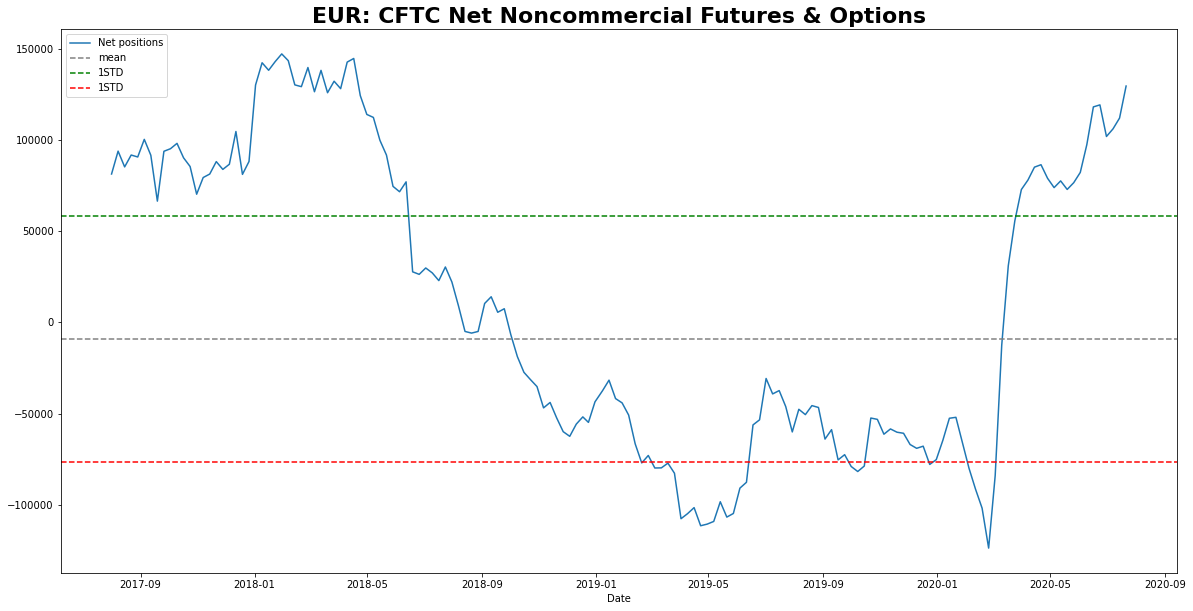

In [21]:
##Plot EUR CFTC data last 3 years
def create_plot(data):
    x = EUR_data.index[-156:]
    y = EUR_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average + std)
    std_negative = (Average - std)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"EUR: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.savefig(f'EURcftc.png', bbox_inches="tight")
    plt.show()
    
create_plot(EUR_data["Net Noncommercial Futures/Options"][-156:])



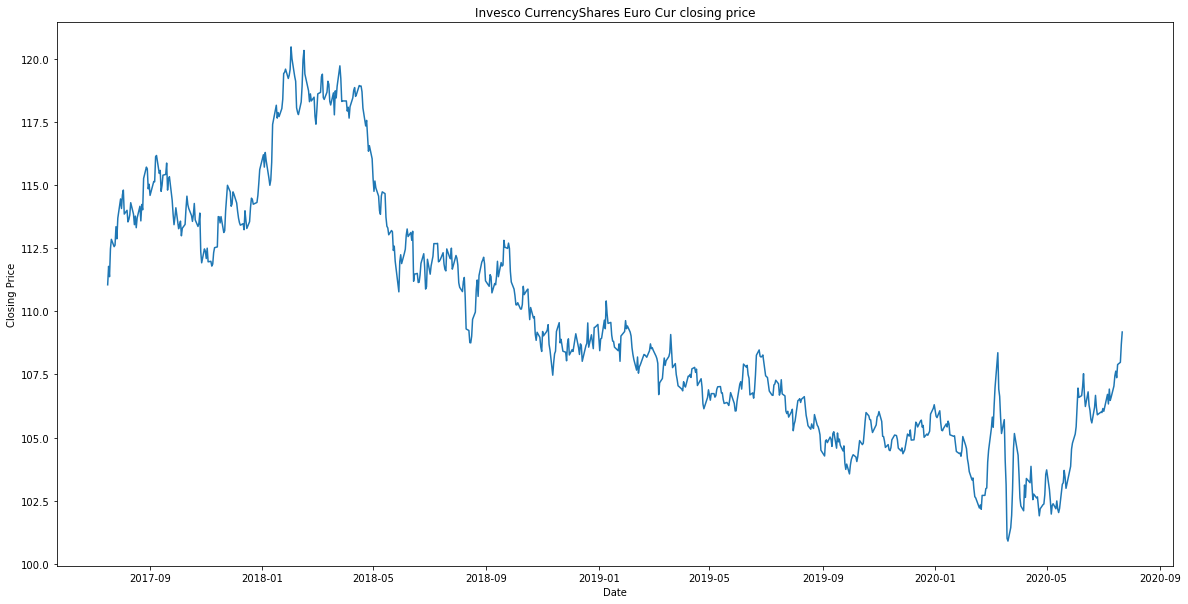

In [105]:
# Plotting Price action
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2017-07-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('FXE')

## CAD: CFTC Analysis
#### (i) Clean data; (ii) Calculate 'Net Non-commercial contracts'; (iii) Calculate avg, std & z-scores; (iv) Add security data to list; (v) Plot results; (vi) Plot price chart

In [109]:
#Getting CFTC data from Quandl
CAD_data = ql.get('CFTC/090741_FO_L_ALL')
CAD_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-16,141969.0,19620.0,45542.0,9154.0,86078.0,61014.0,114852.0,115710.0,27117.0,26259.0
2020-06-23,120862.0,22806.0,43525.0,7698.0,62675.0,44634.0,93178.0,95857.0,27684.0,25005.0
2020-06-30,133791.0,29252.0,48578.0,6841.0,70926.0,53265.0,107018.0,108684.0,26773.0,25107.0
2020-07-07,132272.0,32065.0,48564.0,5444.0,68907.0,51408.0,106416.0,105416.0,25856.0,26856.0
2020-07-14,159324.0,27573.0,47227.0,5586.0,99548.0,80406.0,132708.0,133219.0,26617.0,26105.0


In [110]:
#Clean Data
CAD_data = CAD_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
CAD_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1995-03-21,3967.0,3208.0
1995-03-28,3824.0,2398.0
1995-04-04,7433.0,1614.0
1995-04-11,16619.0,2242.0
1995-04-18,17359.0,847.0


In [111]:
#Calculate Net Data
CAD_data["Net Noncommercial Futures/Options"] = CAD_data["Noncommercial Long"] - CAD_data["Noncommercial Short"]
CAD_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-16,19620.0,45542.0,-25922.0
2020-06-23,22806.0,43525.0,-20719.0
2020-06-30,29252.0,48578.0,-19326.0
2020-07-07,32065.0,48564.0,-16499.0
2020-07-14,27573.0,47227.0,-19654.0


In [112]:
#Calculate mean and std
Average_cad = CAD_data["Net Noncommercial Futures/Options"].mean()
x = np.array(CAD_data["Net Noncommercial Futures/Options"])
std_cad = x.std()

z_score_historical_cad = ((CAD_data["Net Noncommercial Futures/Options"][-1]) - Average_cad)/std_cad
z_score_historical_cad

-0.7112025088351145

In [113]:
#Create list to display data

CAD_list = ["Currency", "CAD", CAD_data["Net Noncommercial Futures/Options"][-1], Average_cad, std_cad, z_score_historical_cad]
print(CAD_list)

['Currency', 'CAD', -19654.0, 2841.4046898638426, 31630.097490388896, -0.7112025088351145]


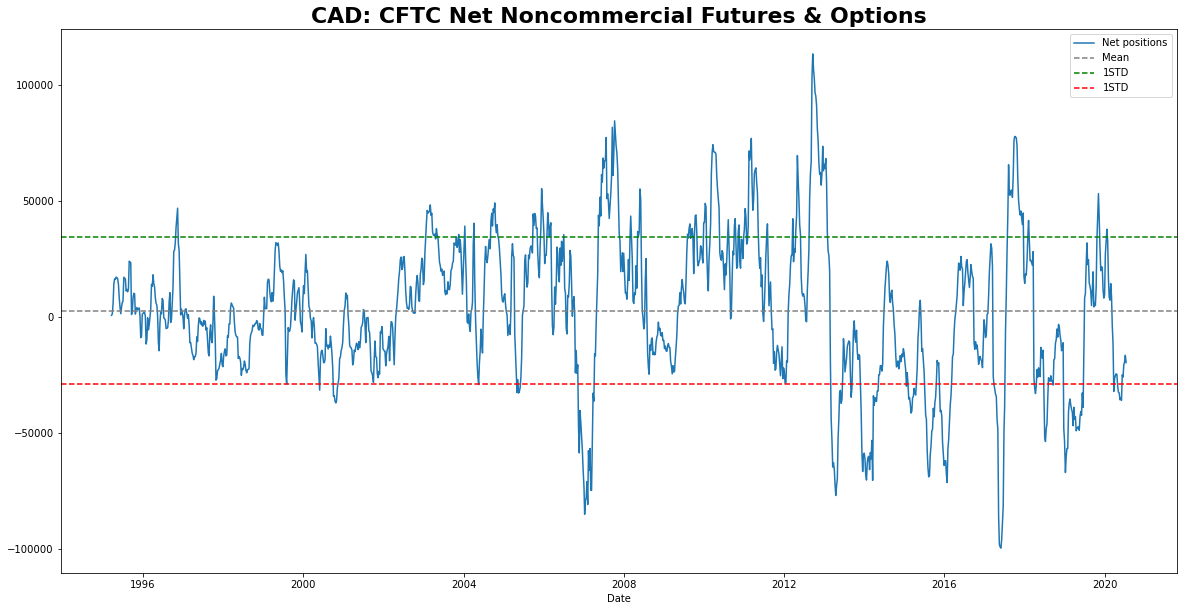

In [114]:
#Plot CAD CFTC data
def create_plot(data):
    x = CAD_data.index
    y = CAD_data["Net Noncommercial Futures/Options"]
    std_positive = (Average_cad + std_cad)
    std_negative = (Average_cad - std_cad)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_cad,color="grey",linestyle="--", label="Mean")
    plt.axhline(y=std_positive, color="green", linestyle="--", label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"CAD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(CAD_data["Net Noncommercial Futures/Options"][-252])

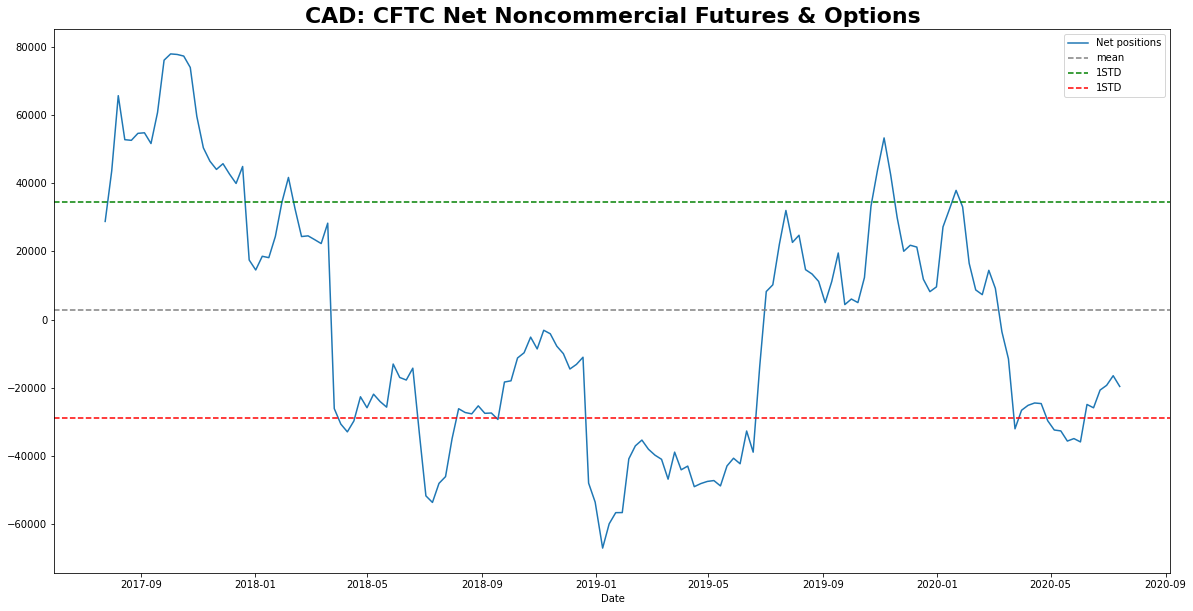

In [115]:
# Plot CAD CFTC data last 3 years
def create_plot(data):
    x = CAD_data.index[-156:]
    y = CAD_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average_cad + std_cad)
    std_negative = (Average_cad - std_cad)


    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_cad,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"CAD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(CAD_data["Net Noncommercial Futures/Options"][-156:])

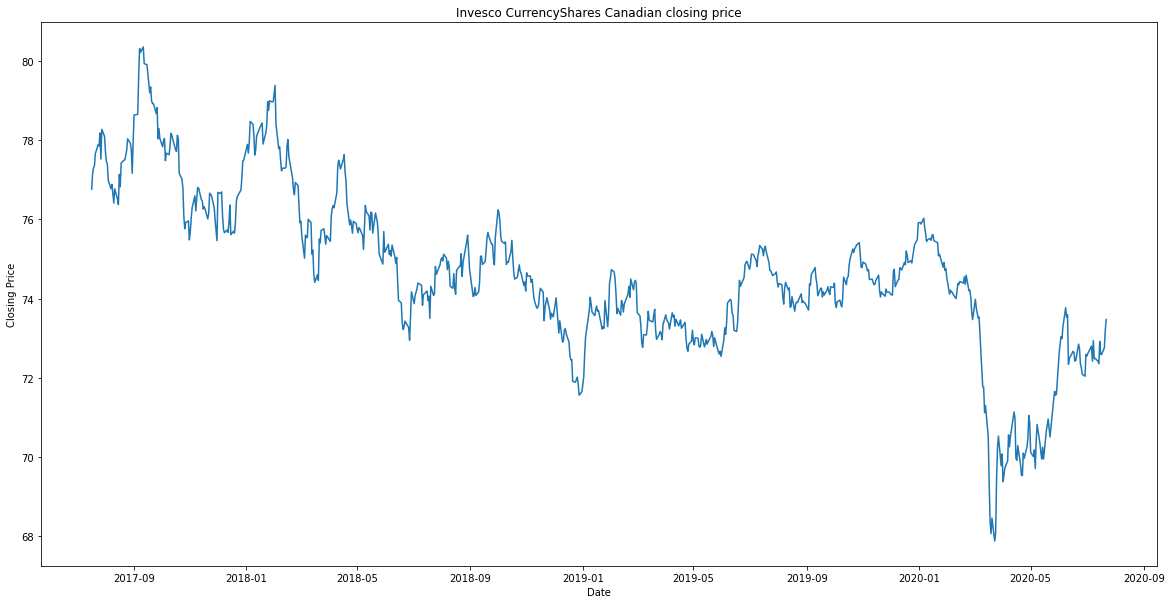

In [116]:
# Plotting Price action
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2017-07-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('FXC')

# USD Analysis
#### (i) Clean data; (ii) Calculate 'Net Non-commercial contracts'; (iii) Calculate avg, std & z-scores; (iv) Add security data to list; (v) Plot results; (vi) Plot price chart

In [117]:
#Getting CFTC data from Quandl
USD_data = ql.get('CFTC/098662_FO_L_ALL')
USD_data.tail()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
2020-06-16,19897.0,10802.0,16140.0,946.0,5625.0,483.0,17374.0,17570.0,2524.0,2328.0
2020-06-23,21629.0,11661.0,16967.0,1094.0,6662.0,857.0,19417.0,18918.0,2212.0,2711.0
2020-06-30,19470.0,9823.0,14787.0,1190.0,5938.0,940.0,16951.0,16918.0,2519.0,2552.0
2020-07-07,22898.0,12150.0,17075.0,1979.0,6316.0,857.0,20445.0,19911.0,2452.0,2987.0
2020-07-14,23531.0,12139.0,17162.0,2220.0,6720.0,1093.0,21078.0,20474.0,2452.0,3056.0


In [118]:
#Clean Data
USD_data = USD_data.drop(columns=["Open Interest", 
                                  "Noncommercial Spreads", 
                                  "Commercial Long", 
                                  "Commercial Short", 
                                  "Total Long",
                                  "Total Short",
                                  "Nonreportable Positions Long", 
                                  "Nonreportable Positions Short"])
USD_data.head()

,Noncommercial Long,Noncommercial Short
Date,,
1995-03-21,2227.0,2334.0
1995-03-28,2803.0,3635.0
1995-04-04,3061.0,4332.0
1995-04-18,4955.0,5570.0
1995-04-25,2847.0,3327.0


In [119]:
#Calculate Net Data
USD_data["Net Noncommercial Futures/Options"] = USD_data["Noncommercial Long"] - USD_data["Noncommercial Short"]
USD_data.tail()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
2020-06-16,10802.0,16140.0,-5338.0
2020-06-23,11661.0,16967.0,-5306.0
2020-06-30,9823.0,14787.0,-4964.0
2020-07-07,12150.0,17075.0,-4925.0
2020-07-14,12139.0,17162.0,-5023.0


In [120]:
#Calculate mean and std
Average_usd = USD_data["Net Noncommercial Futures/Options"].mean()
x = np.array(USD_data["Net Noncommercial Futures/Options"])
std_usd = x.std()


z_score_historical_usd = ((USD_data["Net Noncommercial Futures/Options"][-1]) - Average_usd)/std_usd
z_score_historical_usd

-0.7999520680547448

In [121]:
#Create list to display data

USD_list = ["Currency", "USD", USD_data["Net Noncommercial Futures/Options"][-1], Average_usd, std_usd, z_score_historical_usd]
print(USD_list)

['Currency', 'USD', -5023.0, 10164.389992057188, 18985.37499751527, -0.7999520680547448]


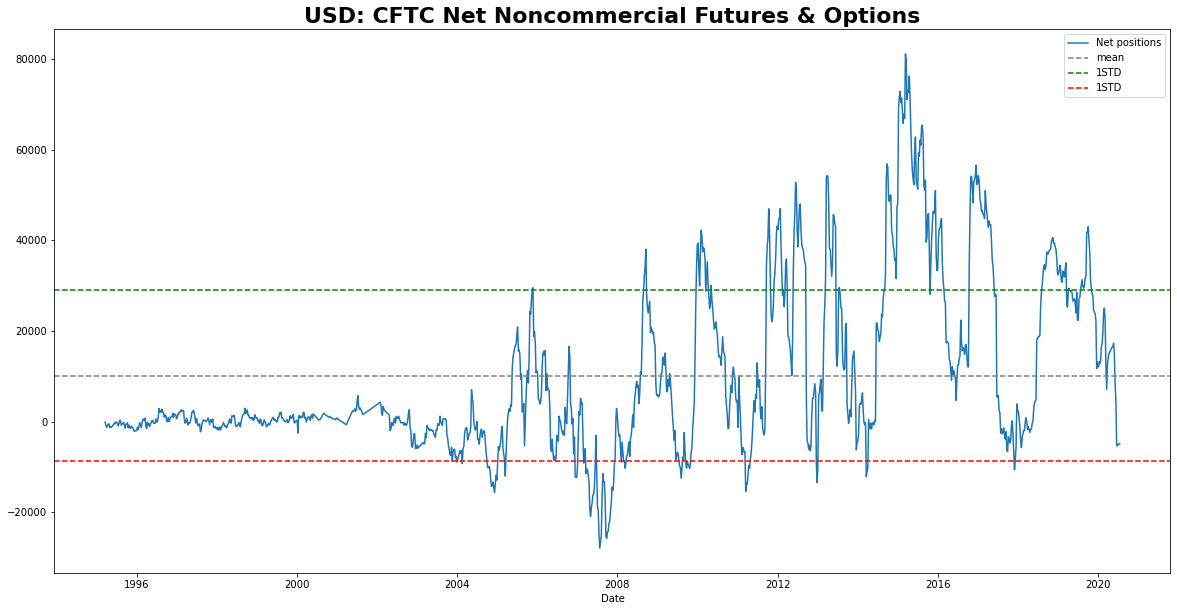

In [122]:
#Plot USD CFTC data
def create_plot(data):
    x = USD_data.index
    y = USD_data["Net Noncommercial Futures/Options"]
    std_positive = (Average_usd + std_usd)
    std_negative = (Average_usd - std_usd)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_usd,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"USD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(USD_data["Net Noncommercial Futures/Options"])

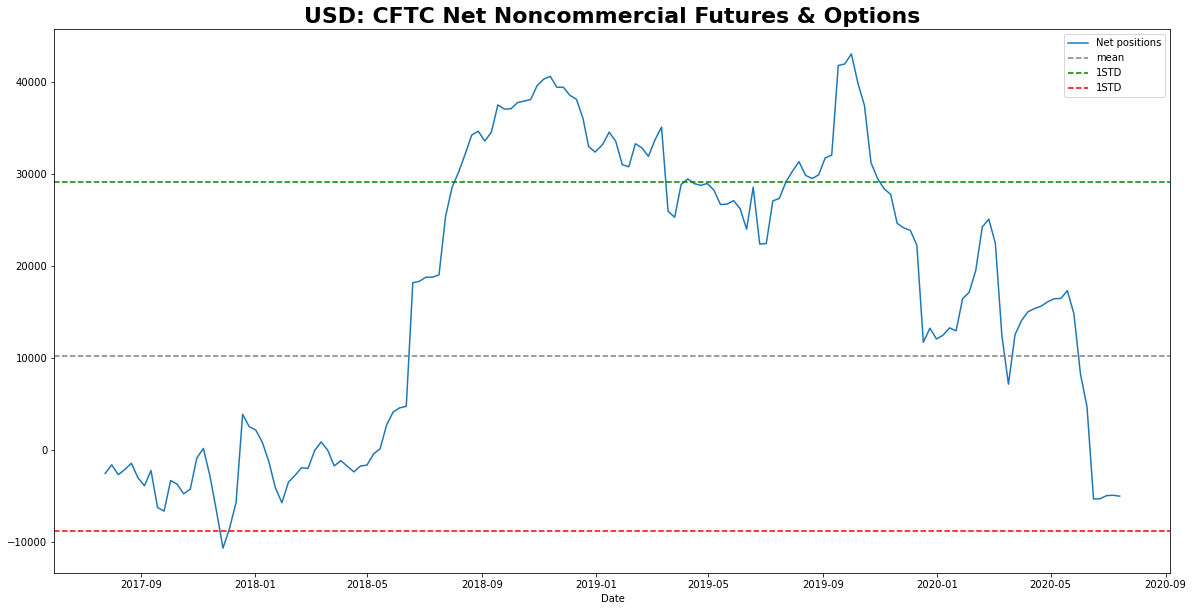

In [123]:
##Plot USD CFTC data last 3 years
def create_plot(data):
    x = USD_data.index[-156:]
    y = USD_data["Net Noncommercial Futures/Options"][-156:]
    std_positive = (Average_usd + std_usd)
    std_negative = (Average_usd - std_usd)

    plt.subplots(figsize=(20,10))
    plt.plot(x,y, label="Net positions")
    plt.axhline(y=Average_usd,color="grey",linestyle="--", label="mean")
    plt.axhline(y=std_positive, color="green", linestyle="--",label="1STD")
    plt.axhline(y=std_negative, color="red", linestyle="--", label="1STD")
    plt.legend()
    plt.xlabel("Date")
    plt.title(f"USD: CFTC Net Noncommercial Futures & Options", fontdict={'fontweight':'bold', 'fontsize':'22'})
    plt.show()
create_plot(USD_data["Net Noncommercial Futures/Options"][-156:])

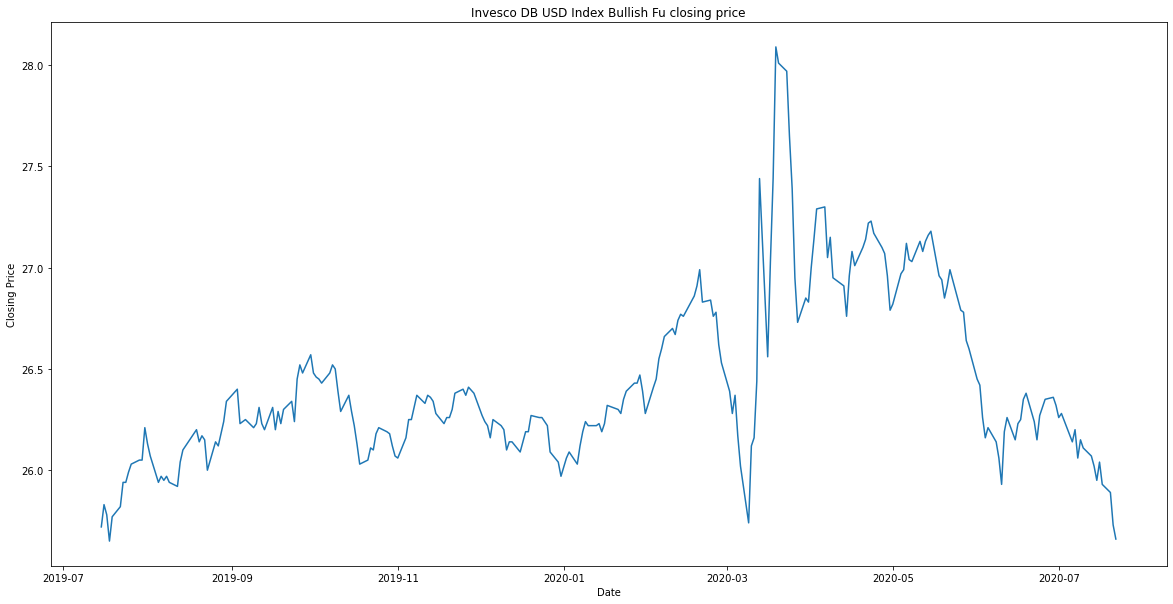

In [125]:
# Plotting Price action
def create_plot(tickersymbol):
    ticker_data = yf.Ticker(tickersymbol)
    today = datetime.datetime.today().isoformat()
    
    ticker_df = ticker_data.history(period='1d', start='2019-07-15', end=today[:10])
    plt.subplots(figsize=(20,10))
    plt.plot(ticker_df["Close"], label=ticker_data.info['shortName'])
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{ticker_data.info['shortName']} closing price")
    
create_plot('UUP')

# Create a dataframe and then exporting to Excel

In [92]:
#Create df

df = pd.DataFrame([EUR_list, CAD_list, USD_list], columns =['Asset_Class','Security',
                                                  'Latest_position',
                                                  'Average_position',
                                                  'STD',
                                                  'Z-score'], dtype = float) 

df

,Asset_Class,Security,Latest_position,Average_position,STD,Z-score
0,Currency,EUR,112124.0,-9012.635231,67344.665312,1.798756
1,Currency,CAD,-19654.0,2841.404690,31630.097490,-0.711203
2,Currency,USD,-5023.0,10164.389992,18985.374998,-0.799952


In [93]:
#Conditional formatting
overbought_threshold = 1.5
oversold_threshold = -1.5

df_styled = df.style\
    .applymap(lambda x: 'background-color: %s' % 'red' if x > overbought_threshold or x < oversold_threshold else 'background_color: %s' % 'green', subset=['Z-score'])
   
df_styled

,Asset_Class,Security,Latest_position,Average_position,STD,Z-score
0,Currency,EUR,112124.000000,-9012.635231,67344.665312,1.798756
1,Currency,CAD,-19654.000000,2841.404690,31630.097490,-0.711203
2,Currency,USD,-5023.000000,10164.389992,18985.374998,-0.799952


In [94]:
import xlsxwriter

In [95]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('cftc_test.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_styled.to_excel(writer, sheet_name='Sheet1', float_format='%.2f')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

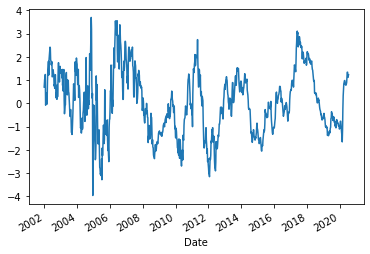

In [127]:
def zscore(x, window):
    r = x.rolling(window=window)
    m = r.mean().shift(1)
    s = r.std(ddof=0).shift(1)
    z = (x-m)/s
    return z

EUR_data['Z_score_3yr'] = zscore(EUR_data.loc[:,'Net Noncommercial Futures/Options'], 52*3)
EUR_data['Z_score_3yr'].plot()